In [3]:
# Importing libraries and packages

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
import csv
from datetime import datetime, timedelta
import pandas as pd
# importing libraris needed for Basic Data cleaning and Tokenazation
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [12]:

# Path to msedgedriver
service = Service('/home/diyorjon/Desktop/chromedriver-linux64/chromedriver')
driver = webdriver.Chrome(service=service)

# URL to Kun.uz news list
driver.get('https://kun.uz/en/news/list')
time.sleep(3)  # Initial page load

# Prepare date range
starting_date = datetime(2024,5,1)
ending_date = datetime(2024,11,1)

# Open CSV file
with open('kun_uz_news.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Title', 'Date', 'Category'])  # Column headers

    while True:
        # Retrieve articles and their publication dates
        articles = driver.find_elements(By.CLASS_NAME, "small-cards__default-text")
        date_elements = driver.find_elements(By.CLASS_NAME, "gray-text")
        category_elements = driver.find_elements(By.CLASS_NAME, "gray-text")
        # Loop through articles
        for article, date_element, category_element in zip(articles, date_elements, category_elements):
            title = article.text
            date_text = date_element.text.strip()
            category_text = category_element.text.strip() if category_element else "Unknown"
            
            if '|' in date_text:
                date_part = date_text.split('/')[-1].strip()
                category = category_text.split('|')[0].strip()
                print('***')
                print(date_part)
                print(category)
                try:
                    article_date = datetime.strptime(date_part, "%d.%m.%Y")
                    print(article_date)
                    # Write on CSV file if only the artilce date is within a desired range
                    if starting_date <= article_date <= ending_date:
                        writer.writerow([title, article_date.strftime("%Y-%m-%d"), category])
                    
                    if article_date == ending_date:
                        print("Started writing on CSV file")
                    
                    # Break if date is older than ending_datae
                    if article_date < starting_date:
                        print("Completed scraping until the ending date.")
                        continue
                    
                    
                
                except ValueError:
                    continue

        # Use CSS selector for nested "More News" button with JavaScript click
        try:
            more_news_button = driver.find_element(By.CSS_SELECTOR, ".point-view__footer-btn .reload-icon")
            driver.execute_script("arguments[0].scrollIntoView(true);", more_news_button)
            driver.execute_script("arguments[0].click();", more_news_button)
            time.sleep(5)  # Increased wait time for more articles to load
        except Exception as e:
            print("Error with 'More News' button:", e)
            break
try:
    driver.quit()
except ConnectionRefusedError:
    pass
print("Closed the driver successfully")


***
SOCIETY | 13:05
SOCIETY
***
23.11.2024
POLITICS
2024-11-23 00:00:00
***
23.11.2024
POLITICS
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
POLITICS
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
23.11.2024
SOCIETY
2024-11-23 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SPORT
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
SOCIETY
2024-11-22 00:00:00
***
22.11.2024
POLITICS
2024-11-22 00:00:00
***
21.11.2024
SOCIETY
2024-11-21 00:00:00
***
21.11.2024
BUSINESS
2024-11-21 00:00:00
***
21.11.2024
BUSINESS

KeyboardInterrupt: 

# Preprocessing 
1. Basic Data Cleaning

Remove any duplicates: Titles may repeat, especially if they’re updates or multiple reports on the same news.
Lowercasing: Convert all text to lowercase to make the analysis case-insensitive.
Punctuation and Stop Words: Remove punctuation and common stop words (e.g., “the,” “is,” “and”) to focus on meaningful words.

2. Tokenization
Split each title into individual words, also called tokens. This is crucial for word clouds and frequency analyses.

In [13]:
# Merging the data
df = pd.read_csv('kun_uz_news.csv')
print("Size of merged data: ", df.shape)
print("Head date : ",df.loc[0,'Date'])
print("Tail date: ",df.loc[df.shape[0] - 1,'Date'])

Size of merged data:  (2546, 3)
Head date :  2024-11-01
Tail date:  2024-05-01


In [14]:
# Download stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/diyorjon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diyorjon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/diyorjon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Define stopwords in English
stop_words = set(stopwords.words('english'))

# Function for basic cleaning and tokenization
def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs, punctuation, numbers, and non-alphabetic characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Apply the function to the 'Title' column and store results in a new column
df['Tokens'] = df['Title'].apply(clean_and_tokenize)

# Display the cleaned and tokenized data
print(df[['Title', 'Tokens']].head())


                                               Title  \
0  Nasaf FC clinches first championship, defeatin...   
1      Unemployment rate in Uzbekistan drops to 5.8%   
2  Shavkat Mirziyoyev announces measures to comba...   
3  Russia’s ex-president calls for excluding non-...   
4  President Mirziyoyev proposes reopening Zarafs...   

                                              Tokens  
0  [nasaf, fc, clinches, first, championship, def...  
1            [unemployment, rate, uzbekistan, drops]  
2  [shavkat, mirziyoyev, announces, measures, com...  
3  [russias, expresident, calls, excluding, nonru...  
4  [president, mirziyoyev, proposes, reopening, z...  


# Creating Wordcloud


In [ ]:
# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

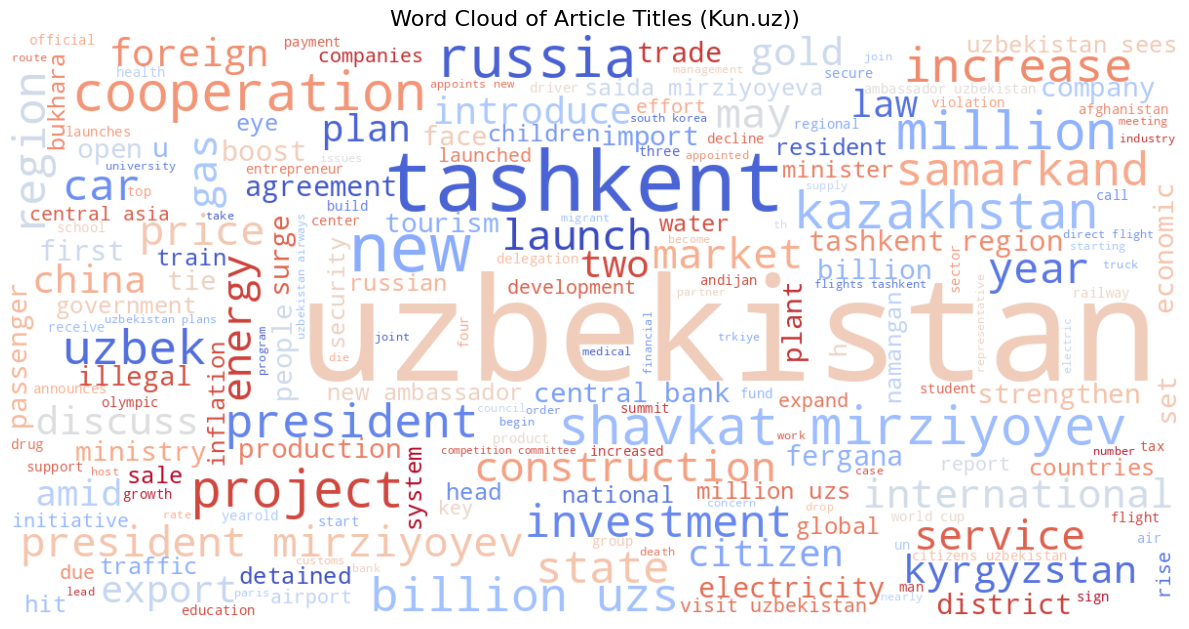

In [ ]:
# Join all tokens into a single string (assuming the 'Tokens' column contains lists of words)
all_tokens = ' '.join([' '.join(tokens) for tokens in df['Tokens']])

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', 
                      max_words=200, colormap='coolwarm').generate(all_tokens)

# Display the word cloud with increased size
plt.figure(figsize=(12, 8))  # Increase the figure size for better resolution
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud

# Add title to the word cloud
plt.title("Word Cloud of Article Titles (Kun.uz))", fontsize=16)

# Display the plot
plt.tight_layout()

# Save the plot with high quality
plt.savefig("wordcloud_high_quality.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Sentiment Analysis

Model: VADER  

Why use VADER?  
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a good choice for our sentiment analysis, since the news article titles are short and written in a formal language, which is why we will not be needing large fine-tuned models, since Bert-base family and other large models are time and resource intensive. 

About:
[VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment).  VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER's lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/diyorjon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
df.Tokens

0       [nasaf, fc, clinches, first, championship, def...
1                 [unemployment, rate, uzbekistan, drops]
2       [shavkat, mirziyoyev, announces, measures, com...
3       [russias, expresident, calls, excluding, nonru...
4       [president, mirziyoyev, proposes, reopening, z...
                              ...                        
2541    [new, deputy, governor, syrdarya, region, appo...
2542    [fees, state, kindergartens, doubled, uzbekistan]
2543            [new, governor, appointed, bukhara, city]
2544    [power, outages, expected, two, districts, tas...
2545    [two, students, attempt, kill, taxi, driver, t...
Name: Tokens, Length: 2546, dtype: object

In [29]:
# Apply VADER sentiment analysis

def analyze_sentiment(tokens):
    title = ' '.join(tokens)
    scores = analyzer.polarity_scores(title)
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

# Add sentiment scores as new columns
df[['Negative', 'Neutral', 'Positive', 'Compound']] = df['Tokens'].apply(analyze_sentiment)

# Display the results
print(df)

                                                  Title        Date  Category  \
0     Nasaf FC clinches first championship, defeatin...  2024-11-01     SPORT   
1         Unemployment rate in Uzbekistan drops to 5.8%  2024-11-01   SOCIETY   
2     Shavkat Mirziyoyev announces measures to comba...  2024-11-01   SOCIETY   
3     Russia’s ex-president calls for excluding non-...  2024-11-01   SOCIETY   
4     President Mirziyoyev proposes reopening Zarafs...  2024-11-01   SOCIETY   
...                                                 ...         ...       ...   
2541   New deputy governor of Syrdarya region appointed  2024-05-01  POLITICS   
2542  Fees for state kindergartens to be doubled in ...  2024-05-01  BUSINESS   
2543             New governor appointed to Bukhara city  2024-05-01  POLITICS   
2544  Power outages expected in two districts of Tas...  2024-05-01   SOCIETY   
2545  Two students attempt to kill a taxi driver in ...  2024-05-01   SOCIETY   

                           

In [30]:
df.columns

Index(['Title', 'Date', 'Category', 'Tokens', 'Negative', 'Neutral',
       'Positive', 'Compound'],
      dtype='object')

In [ ]:
# Group by 'Category' and calculate the mean of 'Compound'
category_sentiment_mean = pd.DataFrame(df.groupby('Category')['Compound'].mean().reset_index())

# Display the result
category_sentiment_mean

,Category,Compound
0,BUSINESS,0.081084
1,CULTURE,0.244617
2,POLITICS,0.092605
3,SOCIETY,-0.057792
4,SPORT,0.203262
5,TECH,-0.018845
6,TOURISM,0.140542


In [8]:
df = pd.read_csv('kun_uz_news_sentiment.csv')
# Sample 2 examples for each sentiment category (negative, neutral, positive)
df_sample = pd.concat([
    df[df['Compound'] < -0.05].sample(2),  # Negative sentiment
    df[(df['Compound'] >= -0.05) & (df['Compound'] <= 0.05)].sample(2),  # Neutral sentiment
    df[df['Compound'] > 0.05].sample(2)  # Positive sentiment
])

# Include only Title and Compound score
df_sample = df_sample[['Title', 'Compound']]

# Display the sampled data with full text
pd.set_option('display.max_colwidth', None)
df_sample.head(6)

,Title,Compound
1089,Rising geopolitical tensions lead Central Bank to increase gold purchases in Q2,-0.1027
1565,Central Bank alerts public to fraudulent calls and fake Telegram accounts,-0.7430
154,Abdulla Aripov congratulates Mikhail Mishustin on his confirmation as Prime Minister of Russia,0.0000
94,Russia starts closing en masse cafés and restaurants opened by migrants,0.0000
2397,Alisher Ganiev wins Uzbekistan's first U23 Greco-Roman Wrestling gold,0.5719
11,Uzbekistan and Germany move to strengthen ties through enhanced cooperation,0.3182


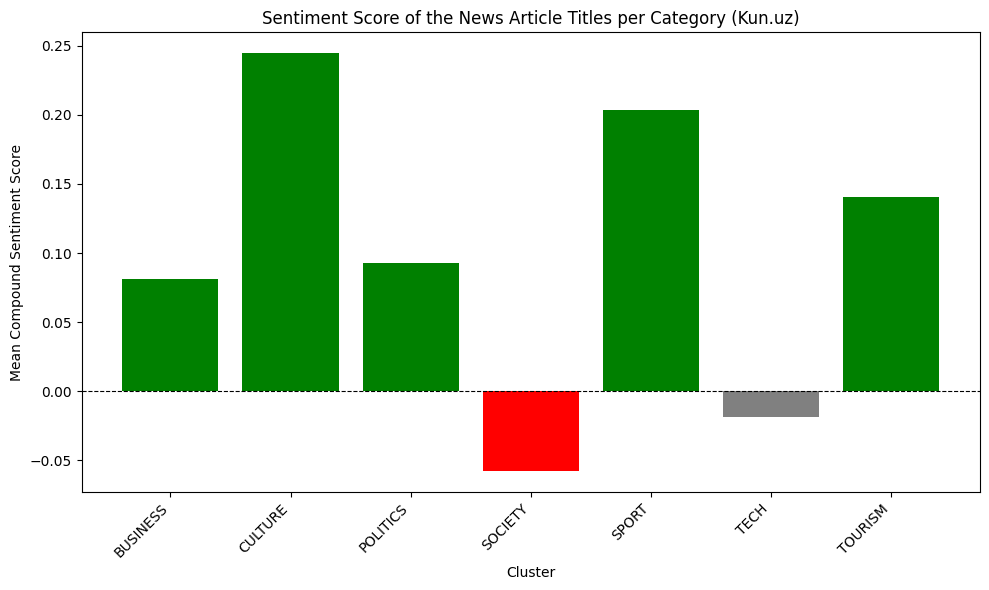

In [32]:
import matplotlib.pyplot as plt
# Function to assign colors based on sentiment thresholds
def assign_color(mean_score):
    if mean_score > 0.05:
        return "green"  # Positive sentiment
    elif mean_score < -0.05:
        return "red"    # Negative sentiment
    else:
        return "grey"   # Neutral sentiment

# Add a color column to the DataFrame
category_sentiment_mean["Color"] = category_sentiment_mean["Compound"].apply(assign_color)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    category_sentiment_mean["Category"],           # X-axis: Clusters
    category_sentiment_mean["Compound"],    # Y-axis: Mean compound sentiment score
    color=category_sentiment_mean["Color"]       # Bar colors based on sentiment
)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at y=0
plt.title("Sentiment Score of the News Article Titles per Category (Kun.uz)")
plt.xlabel("Cluster")
plt.ylabel("Mean Compound Sentiment Score")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.savefig("SentimentScoreCategories.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()


# Sentiment over time

In [6]:
df = pd.read_csv('kun_uz_news_sentiment.csv', index_col = 0)
df.head()

,Title,Date,Category,Tokens,Negative,Neutral,Positive,Compound,Month,Week
2545,Two students attempt to kill a taxi driver in ...,2024-05-01,SOCIETY,"['two', 'students', 'attempt', 'kill', 'taxi',...",0.402,0.598,0.0,-0.6908,2024-05,2024-04-29/2024-05-05
2536,Yandex Go to launch a taxi tariff with e-cars ...,2024-05-01,BUSINESS,"['yandex', 'go', 'launch', 'taxi', 'tariff', '...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2543,New governor appointed to Bukhara city,2024-05-01,POLITICS,"['new', 'governor', 'appointed', 'bukhara', 'c...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2541,New deputy governor of Syrdarya region appointed,2024-05-01,POLITICS,"['new', 'deputy', 'governor', 'syrdarya', 'reg...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2540,Laziz Kudratov held talks with AIIB vice-presi...,2024-05-01,BUSINESS,"['laziz', 'kudratov', 'held', 'talks', 'aiib',...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05


In [25]:
# To adjust the timeline create a unique time period column based on a weekly period. 
df_cpy = df.copy()
df_cpy['Date'] = pd.to_datetime(df_cpy['Date'])  # Convert Date to datetime
unique_periods = {period: idx for idx, period in enumerate(sorted(df_cpy['Date'].dt.to_period('W').unique()))}
df_cpy['NumericPeriod'] = df_cpy['Date'].dt.to_period('W').map(unique_periods)  # Map to numeric periods

df_cpy.head() 

,Title,Date,Category,Tokens,Negative,Neutral,Positive,Compound,Month,Week,NumericPeriod
2545,Two students attempt to kill a taxi driver in ...,2024-05-01,SOCIETY,"['two', 'students', 'attempt', 'kill', 'taxi',...",0.402,0.598,0.0,-0.6908,2024-05,2024-04-29/2024-05-05,0
2536,Yandex Go to launch a taxi tariff with e-cars ...,2024-05-01,BUSINESS,"['yandex', 'go', 'launch', 'taxi', 'tariff', '...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05,0
2543,New governor appointed to Bukhara city,2024-05-01,POLITICS,"['new', 'governor', 'appointed', 'bukhara', 'c...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05,0
2541,New deputy governor of Syrdarya region appointed,2024-05-01,POLITICS,"['new', 'deputy', 'governor', 'syrdarya', 'reg...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05,0
2540,Laziz Kudratov held talks with AIIB vice-presi...,2024-05-01,BUSINESS,"['laziz', 'kudratov', 'held', 'talks', 'aiib',...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05,0


In [4]:
df.to_csv('kun_uz_news_sentiment.csv')

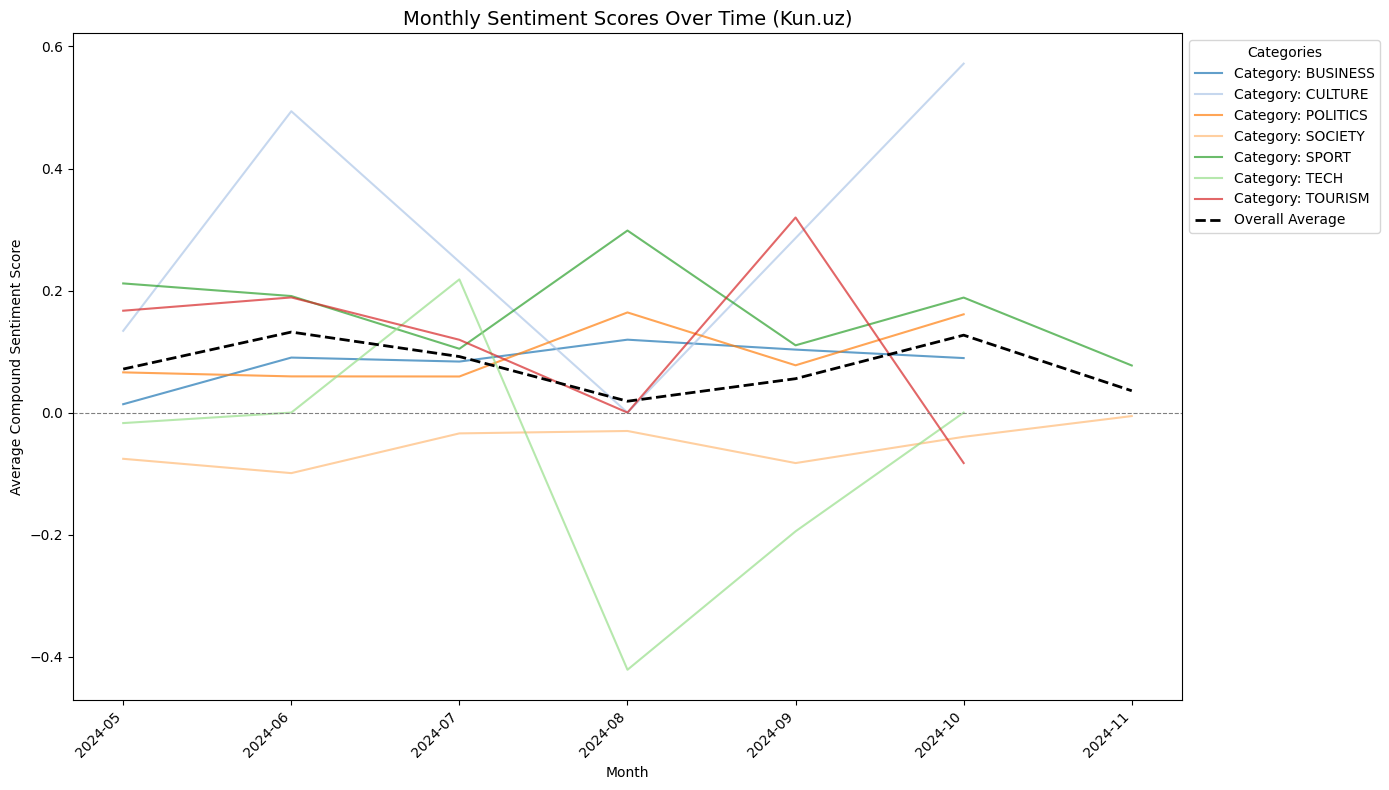

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Date column is datetime and create a Month column
df_cpy['Date'] = pd.to_datetime(df_cpy['Date'])
df_cpy['Month'] = df_cpy['Date'].dt.to_period('M')  # Convert to monthly period

# Group by Month and Category, calculating the average Compound sentiment
monthly_sentiment = df_cpy.groupby(['Month', 'Category'])['Compound'].mean().reset_index()

# Compute overall monthly average sentiment
overall_sentiment = monthly_sentiment.groupby('Month')['Compound'].mean().reset_index()

# Convert Month to numeric for plotting
month_mapping = {period: idx for idx, period in enumerate(monthly_sentiment['Month'].unique())}
monthly_sentiment['NumericMonth'] = monthly_sentiment['Month'].map(month_mapping)
overall_sentiment['NumericMonth'] = overall_sentiment['Month'].map(month_mapping)

# Plotting
plt.figure(figsize=(14, 8))

# Plot each category
categories = monthly_sentiment['Category'].unique()
colors = plt.cm.tab20(range(len(categories)))  # Use colormap for category colors
for category, color in zip(categories, colors):
    category_data = monthly_sentiment[monthly_sentiment['Category'] == category]
    plt.plot(
        category_data['NumericMonth'],
        category_data['Compound'],
        label=f'Category: {category}',
        color=color,
        alpha=0.7  # Transparency for overlapping lines
    )

# Plot the overall average line
plt.plot(
    overall_sentiment['NumericMonth'],
    overall_sentiment['Compound'],
    label='Overall Average',
    color='black',
    linestyle='--',
    linewidth=2
)

# Customize the x-axis
plt.gca().set_xticks(overall_sentiment['NumericMonth'])
plt.gca().set_xticklabels(
    overall_sentiment['Month'].astype(str),
    rotation=45,
    ha='right'
)

# Add labels, title, and legend
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Reference line at y=0
plt.title("Monthly Sentiment Scores Over Time (Kun.uz)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Compound Sentiment Score")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Categories")
plt.tight_layout()

# Save and display the plot
plt.savefig("MonthlySentimentScores.png", dpi=300, bbox_inches='tight')
plt.show()


# Entity Recognition & Sentiment Analysis,

- 'NER' model can extract entity name of different types such as PERSON, ORG, GPE, LOC, EVENT, PRODUCT.   
-  But, we'll only extract people,organizations for this time. Also, we include frequency number as well.


In [3]:
sentiment_df = pd.read_csv('kun_uz_news_sentiment.csv', index_col = 0)
sentiment_df.head()

,Title,Date,Category,Tokens,Negative,Neutral,Positive,Compound,Month,Week
2545,Two students attempt to kill a taxi driver in ...,2024-05-01,SOCIETY,"['two', 'students', 'attempt', 'kill', 'taxi',...",0.402,0.598,0.0,-0.6908,2024-05,2024-04-29/2024-05-05
2536,Yandex Go to launch a taxi tariff with e-cars ...,2024-05-01,BUSINESS,"['yandex', 'go', 'launch', 'taxi', 'tariff', '...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2543,New governor appointed to Bukhara city,2024-05-01,POLITICS,"['new', 'governor', 'appointed', 'bukhara', 'c...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2541,New deputy governor of Syrdarya region appointed,2024-05-01,POLITICS,"['new', 'deputy', 'governor', 'syrdarya', 'reg...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05
2540,Laziz Kudratov held talks with AIIB vice-presi...,2024-05-01,BUSINESS,"['laziz', 'kudratov', 'held', 'talks', 'aiib',...",0.000,1.000,0.0,0.0000,2024-05,2024-04-29/2024-05-05


In [10]:
import ast

# Convert the string representation of lists back to actual lists
sentiment_df['Tokens'] = sentiment_df['Tokens'].apply(ast.literal_eval)

# Check the dtype and the type of the first element
print(sentiment_df.Tokens.dtype)
print(isinstance(sentiment_df['Tokens'].iloc[0], list))

object
True


In [28]:
import spacy
import pandas as pd

# Load spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities from an article
def extract_entities(text):
    doc = nlp(text)
    # Extract all entities (no filtering by type)
    entities = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "PERSON"]]
    return entities

# Ensure the text tokens are combined into strings for entity extraction
sentiment_df['CombinedTokens'] = sentiment_df['Tokens'].apply(lambda tokens: ' '.join(tokens))

# Create a new column for extracted entities
sentiment_df['Entities'] = sentiment_df['CombinedTokens'].apply(extract_entities)

# Create a dictionary to hold sentiment scores and counts
entity_sentiment = {}

for _, row in sentiment_df.iterrows():
    sentiment = row['Compound']
    for entity in row['Entities']:
        if entity not in entity_sentiment:
            entity_sentiment[entity] = {"sentiments": [], "frequency": 0}
        entity_sentiment[entity]["sentiments"].append(sentiment)
        entity_sentiment[entity]["frequency"] += 1

# Calculate the average sentiment score and prepare the DataFrame
entity_data = [
    {"Entity": entity, 
     "Average Sentiment": sum(data["sentiments"]) / len(data["sentiments"]), 
     "Frequency": data["frequency"]}
    for entity, data in entity_sentiment.items()
]

# Convert to DataFrame and sort by frequency
entity_sentiment_df = pd.DataFrame(entity_data).sort_values(by="Frequency", ascending=False)

# Save the results to a CSV file
entity_sentiment_df.to_csv("Entity_Sentiment_Frequency.csv", index=False)

# Display the top results for verification
print('Size of entity_sentiment_df: ', entity_sentiment_df.shape)
print("\nTop Entities by Frequency:\n",)
entity_sentiment_df.head(5)

Size of entity_sentiment_df:  (480, 3)

Top Entities by Frequency:



,Entity,Average Sentiment,Frequency
4,shavkat mirziyoyev,0.121295,65
28,mirziyoyev,0.108798,46
69,senate,0.147633,27
12,un,0.116893,14
159,uzbekistan airways,0.018830,10


In [29]:
entity_sentiment_df.sort_values(by="Average Sentiment", ascending=True).head(5)

,Entity,Average Sentiment,Frequency
440,uzbekistan france discuss,-0.8658,1
250,kia hyundai,-0.8591,1
88,schoolboy,-0.8316,1
58,bear shot dead surkhandarya,-0.8271,1
223,blogger,-0.8225,1


In [30]:
entity_sentiment_df.groupby('Frequency').size()

Frequency
1     413
2      26
3      20
4       6
5       3
6       4
7       2
8       1
10      1
14      1
27      1
46      1
65      1
dtype: int64

In [32]:
# Dropping entities(over 400) with frequency less than 2
entity_sentiment_df = entity_sentiment_df[entity_sentiment_df.Frequency > 1].sort_values(by="Average Sentiment", ascending=True)
entity_sentiment_df.to_csv("Entity_Sentiment_Frequency.csv", index=False)

In [38]:
entity_sentiment_df.head(15)

,Entity,Average Sentiment,Frequency
32,kg gold,-0.680000,2
411,agrarian university,-0.442867,3
38,dia,-0.420100,2
10,namangan,-0.347083,6
385,aziz voitov,-0.284600,2
86,margilan,-0.280767,3
246,competition committee,-0.267933,3
217,adolat party,-0.263350,2
92,paraguay,-0.259000,3
322,taliban,-0.230267,3


In [4]:
import plotly.graph_objects as go

entity_sentiment_df = pd.read_csv("Entity_Sentiment_Frequency.csv")

# Sort entity_sentiment_df by 'Frequency' and get the top 10
top_10_entities = entity_sentiment_df.sort_values(by='Frequency', ascending=False).head(10)

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Entity</b>", "<b>Average Sentiment</b>", "<b>Frequency</b>"],
        fill_color="lightblue",
        align="center",
        font=dict(size=14, color="black"),
        height=30
    ),
    cells=dict(
        values=[
            top_10_entities['Entity'], 
            top_10_entities['Average Sentiment'], 
            top_10_entities['Frequency']
        ],
        fill_color="white",
        align="center",
        font=dict(size=12, color="black"),
        height=25
    )
)])

# Customize layout
fig.update_layout(
    title_text="Top 10 Most Frequent Entities",
    title_x=0.5,  # Center title
    title_font_size=20,
    margin=dict(l=20, r=20, t=60, b=20)  # Adjust margins
)

# Display the table
fig.show()

# Save as an HTML file
fig.write_html("top_10_entities_table.html")